## 数据预处理

In [1]:
import numpy as np
import os,re
from PIL import Image

# 图像切割及特征提取
path = '../data/images/'  # 图片所在路径
# 自定义获取图片名称函数
def getImgNames(path=path):
    '''
    获取指定路径中所有图片的名称
    :param path: 指定的路径
    :return: 名称列表
    '''
    filenames = os.listdir(path)
    imgNames = []
    for i in filenames:
        if re.findall('^\d_\d+\.jpg$', i) != []:
            imgNames.append(i)
    return imgNames

# 自定义获取三阶颜色矩函数
def Var(data=None):
    '''
    获取给定像素值矩阵的三阶颜色矩
    :param data: 给定的像素值矩阵
    :return: 对应的三阶颜色矩
    '''
    x = np.mean((data-data.mean())**3)
    return np.sign(x)*abs(x)**(1/3)

# 批量处理图片数据
imgNames = getImgNames(path=path)  # 获取所有图片名称
n = len(imgNames)        # 图片张数
data = np.zeros([n, 9])  # 用来装样本自变量
labels = np.zeros([n])   # 用来放样本标签

for i in range(n):
    img = Image.open(path+imgNames[i])  # 读取图片
    M,N = img.size  # 图片像素的尺寸
    img = img.crop((M/2-50,N/2-50,M/2+50,N/2+50))    # 图片切割
    r,g,b = img.split()     # 将图片分割成三通道
    rd = np.asarray(r)/255  # 转化成数组数据
    gd = np.asarray(g)/255
    bd = np.asarray(b)/255

    data[i,0] = rd.mean()  # 一阶颜色矩
    data[i,1] = gd.mean()
    data[i,2] = bd.mean()

    data[i,3] = rd.std()   # 二阶颜色矩
    data[i,4] = gd.std()
    data[i,5] = bd.std()

    data[i,6] = Var(rd)    # 三阶颜色矩
    data[i,7] = Var(gd)
    data[i,8] = Var(bd)

    labels[i] = imgNames[i][0]  # 样本标签

print(data)
print(labels)

[[ 0.58275961  0.54368471  0.25242627 ... -0.01263333 -0.01606076
  -0.04140337]
 [ 0.6418702   0.57077255  0.21357176 ...  0.00957151 -0.00398529
  -0.00203014]
 [ 0.60369804  0.57679765  0.28219647 ... -0.00465519 -0.00233666
  -0.00954887]
 ...
 [ 0.44123333  0.51526902  0.19537255 ... -0.00701969 -0.00491445
   0.00924045]
 [ 0.44364431  0.5259898   0.18965569 ... -0.00648428 -0.00700152
   0.00893731]
 [ 0.58383529  0.58097294  0.35063922 ... -0.007575   -0.0089826
  -0.01612694]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3

## 模型构建

In [2]:
from sklearn.model_selection import train_test_split
# 数据拆分,训练集、测试集
data_tr,data_te,label_tr,label_te = train_test_split(data,labels,test_size=0.2,random_state=10)

from sklearn.tree import DecisionTreeClassifier
# 模型训练
model = DecisionTreeClassifier(random_state=5).fit(data_tr, label_tr)

## 模型评价

In [3]:
# 水质评价
from sklearn.metrics import confusion_matrix
pre_te = model.predict(data_te)
# 混淆矩阵
cm_te = confusion_matrix(label_te,pre_te)
print('混淆矩阵为：\n', cm_te)
from sklearn.metrics import accuracy_score
# 准确率
print('准确率为：\n', accuracy_score(label_te,pre_te))

混淆矩阵为：
 [[ 5  1  5  0]
 [ 3  8  0  0]
 [ 2  0 12  0]
 [ 0  1  0  4]]
准确率为：
 0.7073170731707317


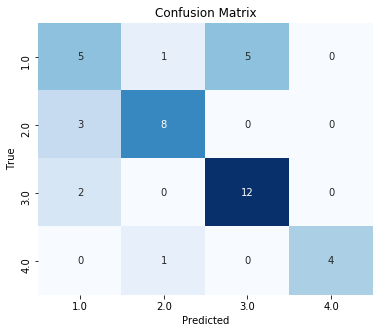

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm_te = confusion_matrix(label_te, pre_te)

# 创建热力图
plt.figure(figsize=(6, 5))
sns.heatmap(cm_te, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=np.unique(label_te), yticklabels=np.unique(label_te))

# 添加标题和标签
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# 显示图形
plt.show()

In [6]:
from sklearn.metrics import classification_report

# 打印分类报告
report = classification_report(label_te, pre_te)
print('分类报告为：\n', report)

分类报告为：
               precision    recall  f1-score   support

         1.0       0.50      0.45      0.48        11
         2.0       0.80      0.73      0.76        11
         3.0       0.71      0.86      0.77        14
         4.0       1.00      0.80      0.89         5

    accuracy                           0.71        41
   macro avg       0.75      0.71      0.73        41
weighted avg       0.71      0.71      0.70        41

